In [71]:
pwd

'C:\\Users\\yumei\\Desktop\\py\\교재data\\DataScience-master'

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ggcode
import matplotlib.pyplot as plt
import os
import seaborn as sns
import googlemaps
import folium
from folium.plugins import MarkerCluster
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })


In [73]:
df=pd.read_csv('./data/02. crime_in_Seoul.csv', thousands=',',encoding='cp949')

In [74]:
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [75]:
df['관서명'].value_counts()

중부서     1
중랑서     1
도봉서     1
은평서     1
방배서     1
노원서     1
송파서     1
양천서     1
서초서     1
구로서     1
종암서     1
강동서     1
강서서     1
관악서     1
강남서     1
금천서     1
종로서     1
강북서     1
서부서     1
광진서     1
동작서     1
성동서     1
영등포서    1
마포서     1
동대문서    1
성북서     1
용산서     1
혜화서     1
서대문서    1
남대문서    1
수서서     1
Name: 관서명, dtype: int64

In [76]:
df['경찰서']='서울'+df['관서명'].str[:-1]+'경찰서'

In [77]:
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,경찰서
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,서울중부경찰서
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,서울종로경찰서
2,남대문서,1,0,6,4,65,46,1153,382,869,794,서울남대문경찰서
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서울서대문경찰서
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,서울혜화경찰서


In [78]:
df['주소']=df['경찰서'].map(ggcode.get_addr)

In [79]:
df['위도']=df['경찰서'].map(ggcode.get_lat)

In [80]:
df['경도']=df['경찰서'].map(ggcode.get_lng)

In [81]:
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,경찰서,주소,위도,경도
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,서울중부경찰서,대한민국 서울특별시 중구 수표로 27,37.563617,126.989652
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,서울종로경찰서,대한민국 서울특별시 종로구 율곡로 46,37.575548,126.984747
2,남대문서,1,0,6,4,65,46,1153,382,869,794,서울남대문경찰서,대한민국 서울특별시 중구 한강대로 410,37.554758,126.973498
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서울서대문경찰서,대한민국 서울특별시 서대문구 통일로 113,37.564744,126.966770
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,서울혜화경찰서,대한민국 서울특별시 종로구 창경궁로 112-16,37.571968,126.998957


In [82]:
df['구별']=[i.split()[2] for i in df['주소']]
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,경찰서,주소,위도,경도,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,서울중부경찰서,대한민국 서울특별시 중구 수표로 27,37.563617,126.989652,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,서울종로경찰서,대한민국 서울특별시 종로구 율곡로 46,37.575548,126.984747,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,서울남대문경찰서,대한민국 서울특별시 중구 한강대로 410,37.554758,126.973498,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서울서대문경찰서,대한민국 서울특별시 서대문구 통일로 113,37.564744,126.966770,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,서울혜화경찰서,대한민국 서울특별시 종로구 창경궁로 112-16,37.571968,126.998957,종로구


In [86]:
df1=df.groupby('구별').sum()
df1.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,위도,경도
구별,,,,,,,,,,,,
강남구,13,10,21,18,449,349,3850,1650,4284,3705,75.002925,254.144170
강동구,4,3,6,8,156,123,2366,789,2712,2248,37.528511,127.126822
강북구,7,8,14,13,153,126,1434,618,2649,2348,37.637304,127.027340
강서구,7,8,13,13,262,191,2096,1260,3207,2718,37.551284,126.850038
관악구,9,8,12,14,320,221,2706,827,3298,2642,37.474395,126.951349


In [87]:
df1['살인검거율']=df1['살인 검거']/df1['살인 발생']*100
df1['강도검거율']=df1['강도 검거']/df1['강도 발생']*100
df1['강간검거율']=df1['강간 검거']/df1['강간 발생']*100
df1['절도검거율']=df1['절도 검거']/df1['절도 발생']*100
df1['폭력검거율']=df1['폭력 검거']/df1['폭력 발생']*100

In [88]:
df1.describe()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.520000,6.120000,11.040000,10.120000,217.960000,163.640000,2212.280000,861.360000,2608.240000,2206.480000,46.565143,157.472604,97.532579,90.242868,77.621027,39.467270,84.720375
std,3.513308,2.976575,4.439219,5.433845,86.322786,57.535409,629.943881,257.311238,630.870185,527.633484,16.373891,55.361012,20.491159,27.590932,12.559091,6.849347,2.369386
min,2.000000,2.000000,5.000000,3.000000,102.000000,105.000000,1063.000000,478.000000,1487.000000,1303.000000,37.456872,126.850038,66.666667,50.000000,48.771930,30.561715,80.109157
25%,4.000000,4.000000,9.000000,6.000000,154.000000,123.000000,1812.000000,711.000000,2209.000000,1855.000000,37.526044,126.951349,85.714286,73.333333,69.062500,35.442359,83.089005
50%,5.000000,5.000000,11.000000,9.000000,194.000000,146.000000,2135.000000,814.000000,2625.000000,2227.000000,37.561730,127.045768,100.000000,85.714286,80.519481,38.072805,84.545135
75%,8.000000,8.000000,14.000000,13.000000,281.000000,183.000000,2555.000000,889.000000,2983.000000,2432.000000,37.653359,127.127248,100.000000,100.000000,84.393064,41.512605,86.538462
max,14.000000,12.000000,22.000000,26.000000,449.000000,349.000000,3850.000000,1650.000000,4284.000000,3705.000000,75.230161,254.144170,166.666667,185.714286,103.921569,60.114504,88.637222


In [113]:
df1.columns

Index(['살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생', '절도 검거',
       '폭력 발생', '폭력 검거', '위도', '경도', '살인검거율', '강도검거율', '강간검거율', '절도검거율',
       '폭력검거율'],
      dtype='object')

In [114]:
cols=['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

In [115]:
for col in cols:
    df1[col]=[100 if i>100 else i for i in df1[col]]

In [116]:
df1.describe()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.520000,6.120000,11.040000,10.120000,217.960000,163.640000,2212.280000,861.360000,2608.240000,2206.480000,46.565143,157.472604,92.389721,84.369852,77.464165,39.467270,84.720375
std,3.513308,2.976575,4.439219,5.433845,86.322786,57.535409,629.943881,257.311238,630.870185,527.633484,16.373891,55.361012,10.835665,15.388641,12.237278,6.849347,2.369386
min,2.000000,2.000000,5.000000,3.000000,102.000000,105.000000,1063.000000,478.000000,1487.000000,1303.000000,37.456872,126.850038,66.666667,50.000000,48.771930,30.561715,80.109157
25%,4.000000,4.000000,9.000000,6.000000,154.000000,123.000000,1812.000000,711.000000,2209.000000,1855.000000,37.526044,126.951349,85.714286,73.333333,69.062500,35.442359,83.089005
50%,5.000000,5.000000,11.000000,9.000000,194.000000,146.000000,2135.000000,814.000000,2625.000000,2227.000000,37.561730,127.045768,100.000000,85.714286,80.519481,38.072805,84.545135
75%,8.000000,8.000000,14.000000,13.000000,281.000000,183.000000,2555.000000,889.000000,2983.000000,2432.000000,37.653359,127.127248,100.000000,100.000000,84.393064,41.512605,86.538462
max,14.000000,12.000000,22.000000,26.000000,449.000000,349.000000,3850.000000,1650.000000,4284.000000,3705.000000,75.230161,254.144170,100.000000,100.000000,100.000000,60.114504,88.637222


In [117]:
df_cctv=pd.read_csv('./data/01. CCTV_result.csv') 
df_cctv.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [118]:
cctv=df_cctv[['구별','인구수','소계']]
cctv.head()

,구별,인구수,소계
0,강남구,570500.0,2780
1,강동구,453233.0,773
2,강북구,330192.0,748
3,강서구,603772.0,884
4,관악구,525515.0,1496


In [119]:
df2 = pd.merge(df1,cctv,on='구별')
df2.head()

,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,소계
0,강남구,13,10,21,18,449,349,3850,1650,4284,3705,75.002925,254.144170,76.923077,85.714286,77.728285,42.857143,86.484594,570500.0,2780
1,강동구,4,3,6,8,156,123,2366,789,2712,2248,37.528511,127.126822,75.000000,100.000000,78.846154,33.347422,82.890855,453233.0,773
2,강북구,7,8,14,13,153,126,1434,618,2649,2348,37.637304,127.027340,100.000000,92.857143,82.352941,43.096234,88.637222,330192.0,748
3,강서구,7,8,13,13,262,191,2096,1260,3207,2718,37.551284,126.850038,100.000000,100.000000,72.900763,60.114504,84.752105,603772.0,884
4,관악구,9,8,12,14,320,221,2706,827,3298,2642,37.474395,126.951349,88.888889,100.000000,69.062500,30.561715,80.109157,525515.0,1496


In [120]:
df2.columns

Index(['구별', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거', '위도', '경도', '살인검거율', '강도검거율', '강간검거율',
       '절도검거율', '폭력검거율', '인구수', '소계'],
      dtype='object')

In [121]:
df2.columns=['구별', '살인', '살인 검거', '강도', '강도 검거', '강간', '강간 검거', '절도',
       '절도 검거', '폭력', '폭력 검거', '위도', '경도', '살인검거율', '강도검거율', '강간검거율',
       '절도검거율', '폭력검거율', '인구수', 'CCTV']

In [122]:
df2=df2[['구별', '살인', '강도', '강간','절도', '폭력','위도', '경도', '살인검거율', '강도검거율', '강간검거율',
       '절도검거율', '폭력검거율', '인구수', 'CCTV']]
df2.head()

,구별,살인,강도,강간,절도,폭력,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
0,강남구,13,21,449,3850,4284,75.002925,254.144170,76.923077,85.714286,77.728285,42.857143,86.484594,570500.0,2780
1,강동구,4,6,156,2366,2712,37.528511,127.126822,75.000000,100.000000,78.846154,33.347422,82.890855,453233.0,773
2,강북구,7,14,153,1434,2649,37.637304,127.027340,100.000000,92.857143,82.352941,43.096234,88.637222,330192.0,748
3,강서구,7,13,262,2096,3207,37.551284,126.850038,100.000000,100.000000,72.900763,60.114504,84.752105,603772.0,884
4,관악구,9,12,320,2706,3298,37.474395,126.951349,88.888889,100.000000,69.062500,30.561715,80.109157,525515.0,1496


In [131]:
df2['살인'].max()-df2['살인'].min()

12

In [138]:
def test(s):
    res=[]
    for i in s:
        min_=s.min()
        max_=s.max()
        result=(i-min_)/(max_-min_)
        res.append(result)
    return res

In [142]:
cols=['살인','강도','강간','절도','폭력']
df2[cols]=df2[cols].apply(test)

In [144]:
df2.head()

,구별,살인,강도,강간,절도,폭력,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
0,강남구,0.916667,0.941176,1.000000,1.000000,1.000000,75.002925,254.144170,76.923077,85.714286,77.728285,42.857143,86.484594,570500.0,2780
1,강동구,0.166667,0.058824,0.155620,0.467528,0.437969,37.528511,127.126822,75.000000,100.000000,78.846154,33.347422,82.890855,453233.0,773
2,강북구,0.416667,0.529412,0.146974,0.133118,0.415445,37.637304,127.027340,100.000000,92.857143,82.352941,43.096234,88.637222,330192.0,748
3,강서구,0.416667,0.470588,0.461095,0.370649,0.614945,37.551284,126.850038,100.000000,100.000000,72.900763,60.114504,84.752105,603772.0,884
4,관악구,0.583333,0.411765,0.628242,0.589523,0.647479,37.474395,126.951349,88.888889,100.000000,69.062500,30.561715,80.109157,525515.0,1496


In [146]:
df2.iloc[:,1:6].sum(axis=1)

0     4.857843
1     1.286607
2     1.641616
3     2.333944
4     2.860342
5     2.204979
6     2.603930
7     0.666924
8     1.905445
9     0.318627
10    1.633921
11    1.451670
12    2.652927
13    0.622036
14    2.464022
15    0.711008
16    0.905522
17    2.987821
18    0.856156
19    3.983733
20    1.423080
21    1.225287
22    1.690786
23    1.310920
24    2.385443
dtype: float64

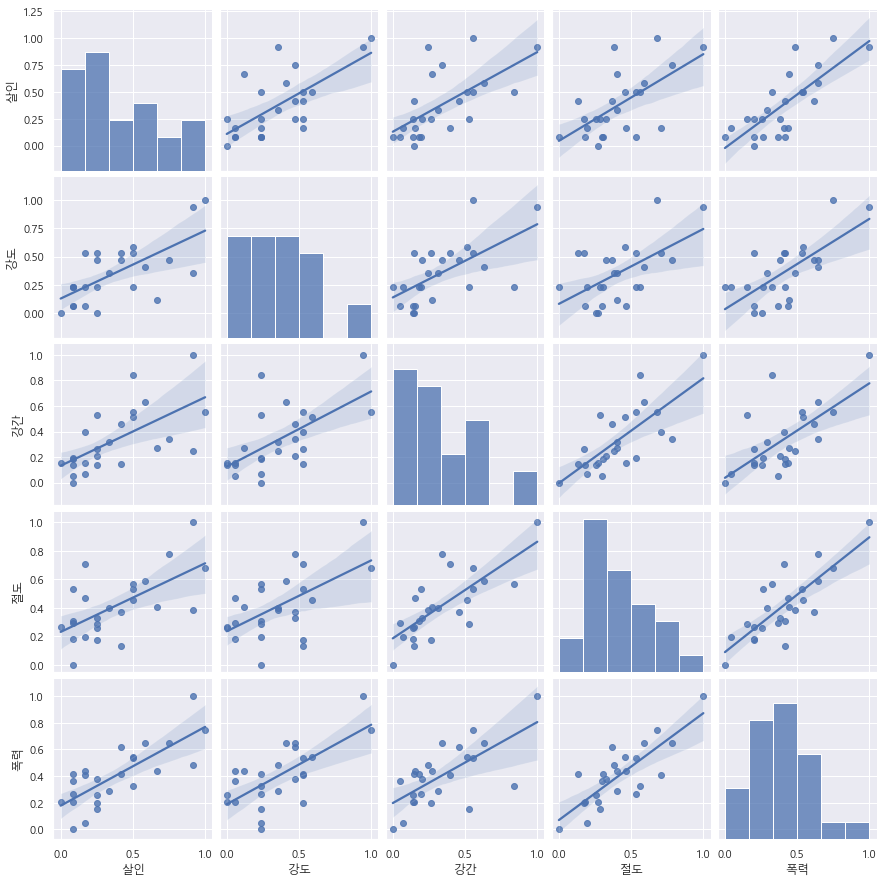

In [147]:
sns.pairplot(df2[cols], kind='reg')

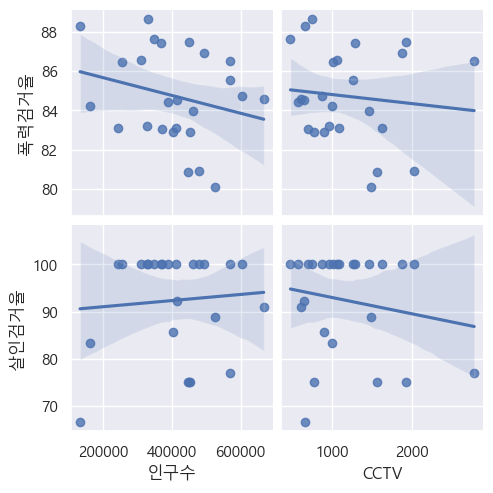

In [152]:
sns.pairplot(df2,x_vars=['인구수','CCTV'], y_vars=['폭력검거율','살인검거율'],kind='reg')

In [157]:
df2['범죄']=df2.loc[:,'살인':'폭력'].sum(axis=1)

In [158]:
df2['검거']=df2.loc[:,'살인검거율':'폭력검거율'].sum(axis=1)

In [159]:
df2.head()

,구별,살인,강도,강간,절도,폭력,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,0.916667,0.941176,1.000000,1.000000,1.000000,75.002925,254.144170,76.923077,85.714286,77.728285,42.857143,86.484594,570500.0,2780,4.857843,369.707384
1,강동구,0.166667,0.058824,0.155620,0.467528,0.437969,37.528511,127.126822,75.000000,100.000000,78.846154,33.347422,82.890855,453233.0,773,1.286607,370.084431
2,강북구,0.416667,0.529412,0.146974,0.133118,0.415445,37.637304,127.027340,100.000000,92.857143,82.352941,43.096234,88.637222,330192.0,748,1.641616,406.943540
3,강서구,0.416667,0.470588,0.461095,0.370649,0.614945,37.551284,126.850038,100.000000,100.000000,72.900763,60.114504,84.752105,603772.0,884,2.333944,417.767372
4,관악구,0.583333,0.411765,0.628242,0.589523,0.647479,37.474395,126.951349,88.888889,100.000000,69.062500,30.561715,80.109157,525515.0,1496,2.860342,368.622261


In [160]:
df2['검거1']=df2['검거']/df2['검거'].sum()*100

In [163]:
df2.sort_values('검거1', ascending=False)

,구별,살인,강도,강간,절도,폭력,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,검거1
9,도봉구,0.083333,0.235294,0.000000,0.000000,0.000000,37.653359,127.052682,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167,4.572729
7,금천구,0.083333,0.058824,0.141210,0.180840,0.202717,37.456872,126.897043,100.000000,100.000000,80.794702,56.668794,86.465433,255082.0,1015,0.666924,423.928929,4.481144
3,강서구,0.416667,0.470588,0.461095,0.370649,0.614945,37.551284,126.850038,100.000000,100.000000,72.900763,60.114504,84.752105,603772.0,884,2.333944,417.767372,4.416013
5,광진구,0.166667,0.529412,0.397695,0.704342,0.406864,37.542873,127.083821,100.000000,100.000000,91.666667,42.200925,83.047619,372164.0,707,2.204979,416.915211,4.407005
10,동대문구,0.250000,0.470588,0.204611,0.329386,0.379335,37.585061,127.045768,100.000000,100.000000,84.393064,41.090358,87.401884,369496.0,1294,1.633921,412.885306,4.364407
20,용산구,0.250000,0.529412,0.265130,0.177252,0.201287,37.538710,126.965918,100.000000,100.000000,89.175258,37.700706,83.121951,244203.0,1624,1.423080,409.997915,4.333886
15,성동구,0.166667,0.235294,0.069164,0.195192,0.044691,37.561730,127.036422,100.000000,88.888889,94.444444,37.149969,86.538462,311244.0,1062,0.711008,407.021764,4.302426
2,강북구,0.416667,0.529412,0.146974,0.133118,0.415445,37.637304,127.027340,100.000000,92.857143,82.352941,43.096234,88.637222,330192.0,748,1.641616,406.943540,4.301599
16,성북구,0.250000,0.000000,0.138329,0.259060,0.258134,75.193421,254.056722,100.000000,80.000000,82.666667,41.512605,83.974649,461260.0,1464,0.905522,388.153921,4.102984
13,서대문구,0.000000,0.000000,0.149856,0.268748,0.203432,37.564744,126.966770,100.000000,80.000000,80.519481,40.728477,83.219844,327163.0,962,0.622036,384.467802,4.064019


In [175]:
m = folium.Map(
  location=[36.5053542,127.7043419],
  zoom_start=7
)
 
marker_cluster = MarkerCluster().add_to(m)
 
for i in range(len(df2)):
    folium.Marker(
    location=(df2['위도'][i],df2['경도'][i]),
    popup=df2['구별'][i],
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)
m